
<p align="center" width="100%">
    <img width="25%" src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png?20140912155123">
    <img width="10%" style='margin=:10px' src="https://static.wixstatic.com/media/a44da8_fd6bed84d4234271aa6c53350d454b42~mv2.png/v1/fill/w_260,h_260,al_c,q_85,usm_2.00_1.00_0.00,enc_auto/Kaggle%20Competition%20Logo%20Without%20Text.png">
    <img width="35%" src="https://assets.stickpng.com/images/5841c6fba6515b1e0ad75aaa.png">
</p>



# Quora Question Pairs [Competition](https://www.kaggle.com/c/quora-question-pairs) 
#### Can you identify question pairs that have the same intent?


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c quora-question-pairs

100% 308M/309M [00:08<00:00, 41.5MB/s]
100% 309M/309M [00:08<00:00, 36.5MB/s]


In [ ]:
# Unzip all the folders
import zipfile 
zip_ref = zipfile.ZipFile("/content/quora-question-pairs.zip", "r")
zip_ref.extractall("/content/dataset")

zip_ref = zipfile.ZipFile("/content/dataset/test.csv.zip", "r")
zip_ref.extractall("/content/dataset")

zip_ref = zipfile.ZipFile("/content/dataset/train.csv.zip", "r")
zip_ref.extractall("/content/dataset")

zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/dataset/train.csv")
df = df.sample(30000)

In [ ]:
df.head(4)

,id,qid1,qid2,question1,question2,is_duplicate
24428,24428,45640,45641,How is it possible for anything to exist anywh...,How does anything exist?,1
38323,38323,69619,69620,What's the next major technical innovation in ...,What is the next major technical innovation?,0
24504,24504,45771,45772,What are some ways to make water kefir grains ...,Can water kefir grains be grown/started from s...,0
172935,172935,266900,266901,Why should I not watch Dangal?,Should I watch Dangal Movie?,0


In [ ]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [ ]:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print("Number of unique : ", len(np.unique(qid)))

x = qid.value_counts()>1
print("Number of question getting repeated : ", x[x].shape[0])

Number of unique :  55298
Number of question getting repeated :  3473


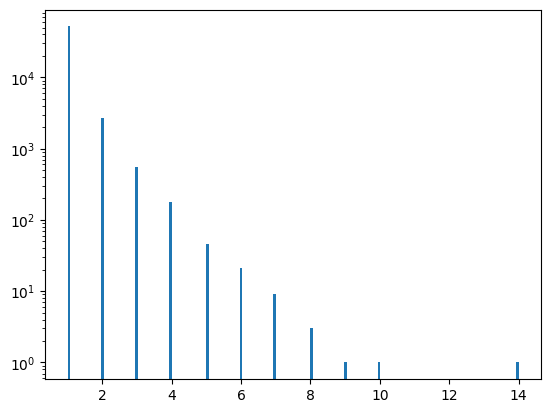

In [ ]:
plt.hist(qid.value_counts(), bins=160)
plt.yscale('log')
plt.show()

0    18818
1    11182
Name: is_duplicate, dtype: int64


<Axes: >

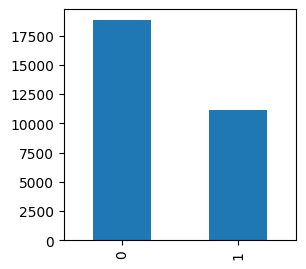

In [ ]:
print(df["is_duplicate"].value_counts())

plt.figure(figsize=(3, 3))
df["is_duplicate"].value_counts().plot(kind='bar', )

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df = df.dropna()

# **Method 1**: Random Forest
**Accuracy using Random-Forest** : *0.73*

Apply random forest on the dataset directly, Let's see what is the accuracy.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
questions = list(df["question1"].values) + list(df["question2"].values)

In [ ]:
print("No. of questions: ", len(questions))
questions[:4] # All the questions 

No. of questions:  60000


['how is it possible for anything to exist anywhere',
 'what is the next major technical innovation in photography',
 'what are some ways to make water kefir grains multiply',
 'why should i not watch dangal']

In [ ]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [ ]:
q1_arr.shape

(30000, 3000)

In [ ]:
q2_arr.shape

(30000, 3000)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=df.index)
temp_df2 = pd.DataFrame(q2_arr, index=df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
24428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# temp_df["is_duplicate"] = df["is_duplicate"]

In [ ]:
temp_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
24428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = temp_df.iloc[:, :].values
y = df["is_duplicate"].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)

print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (21000, 6000)
y_train.shape (21000,)
X_test.shape (9000, 6000)
y_test.shape (9000,)


In [ ]:
# Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score  

rf = RandomForestClassifier()  
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
accuracy_score(pred, y_test) # Accuracy score 

0.744

# **Method 1.2**: Random Forest after *`feature engineering`*
### **Accuracy after feature eng. using Random-Forest** : *0.73*

In the feature engineering: *we will add this features in the data_frame*
  - `question1_lenght` - char lenght of question1 
  - `question2_lenght` - char lenght of question2 
  - `q1_word_count` - no. of words in the question1
  - `q2_word_count` - no. of words in the question2
  - `word_commmon` - common word in q1 & q2
  - `word_total` - Total word in q1 + q2
  - `word_share` - word_common / word-total



In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
24428,24428,45640,45641,how is it possible for anything to exist anywhere,how does anything exist,1
38323,38323,69619,69620,what is the next major technical innovation in...,what is the next major technical innovation,0
24504,24504,45771,45772,what are some ways to make water kefir grains ...,can water kefir grains be grown started from s...,0
172935,172935,266900,266901,why should i not watch dangal,should i watch dangal movie,0
247533,247533,360782,360783,what can i do i have extreme pain in my feet a...,my big toe on my right foot is slightly deviat...,0


In [ ]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(' ')))
  w2 = set(map(lambda word: word.lower().strip(), row["question1"].split(' ')))
  return len(w1 & w2)

def total_word(row):
  w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(' ')))
  w2 = set(map(lambda word: word.lower().strip(), row["question1"].split(' ')))
  return len(w1) +  len(w2)

In [ ]:
temp_df["q1_len"] = df["question1"].str.len()
temp_df["q2_len"] = df["question2"].str.len()

temp_df["q1_word_count"] = df["question1"].apply(lambda row: len(row.split(" ")))
temp_df["q2_word_count"] = df["question2"].apply(lambda row: len(row.split(" ")))

temp_df["word_commmon"] = df.apply(common_words, axis=1)

temp_df["total_word"] = df.apply(total_word, axis=1)

# temp_df["word_share"] = round(temp_df["word_commmon"] / temp_df["total_word"], 2).astype(float)

In [ ]:
# Optinal 
# temp_df["word_share"] = round(temp_df["word_commmon"] / temp_df["total_word"], 2).astype(float)

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2996,2997,2998,2999,q1_len,q2_len,q1_word_count,q2_word_count,word_commmon,total_word
24428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,49,23,9,4,9,18
38323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,58,43,9,7,9,18
24504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,54,73,10,14,10,20
172935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,29,27,6,5,6,12
247533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,131,137,32,30,26,52


In [ ]:
X = temp_df.iloc[:].values
y = df["is_duplicate"].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
rf = RandomForestClassifier()  
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
accuracy_score(pred, y_test) # Accuracy score

0.7403333333333333

# Method 1.3: Random Forest after *`Advance feature engineering.`*

- ### Token Feature
  - `cwc_min` : ratio of the no. of common "words" to the lenght of the **smaller question**.
  - `cwc_max` : ratio of the no. of common "words" to the lenght of the **larger question**.
  - `csc_min` : ratio of the no. of common 'stop words' to the smaller stop words counts among the two questions.
  - `csc_max` : ratio of the no. of common 'stop words' to the larger 'stop words' counts among the two questions
  - `ctc_min` : ratio of the no. of common 'tokens' to the smaller 'tokens' counts among the two questions.
  - `ctc_max` : ratio of the no. of common 'tokens' to the larger 'tokens' counts among the two questions.
  - `last_word_eq` : **"1"** if the last word in the two question is same, otherwise **"0"**
  - `first_word_eq` : **"1"** if the first word in the two question is same, otherwise **"0"**


- ### Lenght Based Features 
  - `mean_len` : Mean of the lenght of the two question (number of words).
  - `abs_len_diff` : Absolute diffrent between the nunber of two questions.
  - `longest_substr_ratio`: Ratio of the lenght longest substring among the two questions to the lenght of the smaller question.

- ### Fuzzy Features
  - `fuzz_ratio`: fuzz ratio from fuzzywuzzy
  - `fuzz_partial_ratio`: fuzz partial ratio  from fuzzywuzzy
  - `token_sort_ratio`: fuzz token_sort_ratio  from fuzzywuzzy
  - `token_set_ratio`: fuzz token_set_ratio  from fuzzywuzzy

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
token_features = temp_df.apply(fetch_token_features, axis=1)

temp_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
temp_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
temp_df["csc_min"]       = list(map(lambda x: x[2], token_features))
temp_df["csc_max"]       = list(map(lambda x: x[3], token_features))
temp_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
temp_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
temp_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
temp_df["first_word_eq"]  = list(map(lambda x: x[7], token_features))